Carlos Bravo Garrán - 100474964

 # __Análisis Exploratorio de Datos (EDA)__ 

 En este notebook realizaremos un Análisis Exploratorio de Datos (EDA) simplificado del conjunto de datos proporcionado, cuyo objetivo es analizar y comprender los factores que influyen en el abandono laboral (Attrition) en una organización.

## 1. __Cargar librerías y datos__


In [235]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Graphs
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.impute import SimpleImputer

# Warnings configuration
import warnings
warnings.filterwarnings('ignore')


Cargamos el conjunto de datos desde el archivo CSV


In [236]:
df = pd.read_csv("../data/attrition_availabledata_03.csv")

## 2. __Exploración inicial__

En esta sección revisamos la estructura general del dataset


In [237]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2925 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2919 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

In [238]:
dataset_shape = df.shape
print(f"El dataset contiene {dataset_shape[0]} filas y {dataset_shape[1]} columnas.")

El dataset contiene 2940 filas y 31 columnas.


In [239]:
df.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2925.000000,2928.000000,2919.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2927.000000,2940.000000,2940.0,2940.000000,2934.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.326447,12.701701,2.740476,3.160884,2.726496,2.715847,2.756423,36.782653,9.287755,2.902721,...,65115.350340,2.664161,15.260544,8.0,0.789796,11.262440,2.812925,6.988095,2.192517,4.127891
std,1.334478,5.518054,0.718440,0.367487,1.093007,1.099055,0.717885,9.157614,8.157695,1.030032,...,47196.796005,2.495031,3.706960,0.0,0.843302,7.787843,1.287138,5.994740,3.220122,3.540747
min,5.416880,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.285664,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,28860.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,7.029037,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35.000000,7.000000,3.000000,...,48980.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.907145,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,83920.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [240]:
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,6.466932,14,3,4,3.0,3.0,3.0,34,Non-Travel,Research & Development,...,Y,20,8,1,6.0,3,3,1,2,No
1,6.976151,19,3,3,3.0,1.0,3.0,28,Travel_Rarely,Sales,...,Y,15,8,0,3.0,6,3,1,2,No
2,6.076227,13,2,3,4.0,3.0,3.0,24,Travel_Rarely,Sales,...,Y,12,8,0,1.0,2,1,0,0,Yes
3,7.426888,5,2,3,3.0,2.0,3.0,38,Travel_Rarely,Research & Development,...,Y,19,8,1,7.0,3,5,1,4,Yes
4,5.783249,14,2,3,3.0,4.0,3.0,26,Travel_Rarely,Sales,...,Y,12,8,0,5.0,2,5,1,2,No


In [241]:
df[['Attrition']].head()

,Attrition
0,No
1,No
2,Yes
3,Yes
4,No


Este es un problema de __clasificación__, ya que la variable objetivo (Attrition) es binaria (Yes / No). Esto significa que el modelo debe predecir si un empleado abandonará o no la empresa, en lugar de predecir un valor numérico.

## 3. __Identificamos las variables categóricas y numéricas__

In [242]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Variables categóricas:", categorical_columns)
print("Variables numéricas:", numerical_columns)

Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### Reclasificamos las variables añadiendo ordinales

In [243]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_columns = ["Education", "JobLevel", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "PerformanceRating", "StockOptionLevel"]
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Eliminamos de numéricas las que hemos clasificado como ordinales
numerical_columns = [col for col in numerical_columns if col not in ordinal_columns]

print("Variables categóricas:", categorical_columns)
print("Variables ordinales:", ordinal_columns)
print("Variables numéricas:", numerical_columns)


Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Variables ordinales: ['Education', 'JobLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'StockOptionLevel']
Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'Age', 'DistanceFromHome', 'EmployeeCount', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### Detección de Variables Categóricas con Alta Cardinalidad

 Identificamos variables categóricas que pueden generar demasiadas columnas al codificarlas


In [244]:
categorical_cardinality = df[categorical_columns].nunique().sort_values(ascending=False)
display(categorical_cardinality)


JobRole           9
EducationField    6
Department        3
BusinessTravel    3
MaritalStatus     3
Gender            2
Attrition         2
Over18            1
dtype: int64

No consideramos que existan variables categóricas de alta cardinalidad, por lo tanto no necesitaremos realizar ninguna agrupación adicional o una diferente codificación.

## 4. __Análisis de la variable objetivo__

Revisamos la distribución de la variable objetivo para identificar desbalance de clases


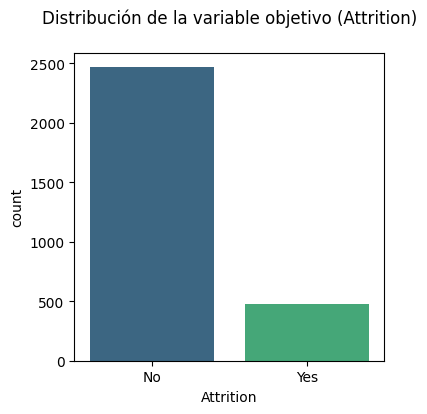

,proportion
0,83.877551
1,16.122449


In [245]:
if "Attrition" in df.columns:
    plt.figure(figsize=(4,4))
    sns.countplot(x=df["Attrition"], palette="viridis")
    plt.title("Distribución de la variable objetivo (Attrition)\n")
    plt.show()
    
    attrition_counts = df["Attrition"].value_counts(normalize=True)
    display(pd.DataFrame(attrition_counts).rename(columns={"Attrition": "Proportion"}).reset_index(drop=True)*100)


In [246]:
df.Attrition.value_counts().sort_index().to_frame()

,count
Attrition,
No,2466
Yes,474


 El dataset está desbalanceado, con 2466 empleados que no abandonan la empresa (NO) y 474 que sí lo hacen (SI). 
 
 Esto significa que la mayoría de los empleados no abandonan la empresa, lo que podría causar que un modelo mal entrenado siempre prediga "No", logrando una precisión aparente alta, pero sin realmente capturar los casos de abandono.

Por lo tanto la solución sería aplicar técnicas como:

- Oversampling (SMOTE): Aumentar el número de ejemplos de la clase minoritaria (Yes).
- Undersampling: Reducir los casos de la clase mayoritaria (No).
- Pesos en los modelos: Ajustar la importancia de la clase minoritaria. 



## 5. __Identificar valores nulos__

In [247]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].to_frame().reset_index()
missing_values.columns = ["Column Name", "Missing Values"]

display(missing_values)

,Column Name,Missing Values
0,EnvironmentSatisfaction,15
1,JobSatisfaction,12
2,WorkLifeBalance,21
3,NumCompaniesWorked,13
4,TotalWorkingYears,6


Ya que los valores faltantes son muy pocos en comparación con el número de datos totales vamos a tomar las siguientes medidas:
- Imputamos valores faltantes en las variables numéricas con la mediana
- Imputamos valores faltantes en las variables categóricas con la moda

In [248]:
# Columnas diferenciadas por tipo
num_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in ordinal_columns]
ord_cols = ordinal_columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Imputación para variables numéricas (mediana)
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Imputación para variables ordinales (mediana también)
ord_imputer = SimpleImputer(strategy='median')
df[ord_cols] = ord_imputer.fit_transform(df[ord_cols])

# Imputación para variables categóricas (moda)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("Valores nulos imputados correctamente con SimpleImputer para numéricas, ordinales y categóricas.\n")

null = df.isnull().sum().sum()
print(f"Valores nulos restantes en el dataset: {null}")


Valores nulos imputados correctamente con SimpleImputer para numéricas, ordinales y categóricas.

Valores nulos restantes en el dataset: 0


## 6. __Identificar variables constantes e identidicativas__

### Comprobar si existen columnas con valores únicos

In [249]:
unique_values = df.nunique()

constant_columns = df.nunique()[df.nunique() == 1].to_frame().reset_index()
constant_columns.columns = ["Column Name", "Unique Value Count"]
constant_columns["Unique Value"] = constant_columns["Column Name"].apply(lambda col: df[col].unique()[0])
constant_columns_list = constant_columns["Column Name"].tolist()

display(constant_columns)

,Column Name,Unique Value Count,Unique Value
0,EmployeeCount,1,1.0
1,Over18,1,Y
2,StandardHours,1,8.0


### Comprobar si hay columnas con variables ID

In [250]:
print(f"Número total de filas: {len(df)}")

unique_values = df.nunique()
print("Número de valores únicos por columna:")
print(unique_values, "\n")

id_columns = [col for col in df.columns if df[col].nunique() == len(df)]
print("Columnas identificativas detectadas:", id_columns)

Número total de filas: 2940
Número de valores únicos por columna:
hrs                        2939
absences                     24
JobInvolvement                4
PerformanceRating             2
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
Age                          43
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 2940
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1304
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsW

Como se podía prever, comprobamos que "EmployeeID" es una variable identificativa, por lo que es redundante para el estudio. 

Por otro lado, la columna "hours" tiene 2939 valores, 1 menos que el total de filas. Podríamos pensar que es identificativa, pero comprobando los valores vemos que simplemente son valores decimales unos distintos de otros.

### Eliminar las columnas constantes e identificativas

In [251]:
df = df.drop(columns=constant_columns_list + id_columns, errors='ignore')
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()


print('Se han eliminado las columnas:', constant_columns_list + id_columns)

Se han eliminado las columnas: ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']


## 7. __Crear matriz de correlación__

Generamos la matriz de correlación para entender relaciones entre las variables numéricas, habiendo eliminado ya las constantes y las identificativas.

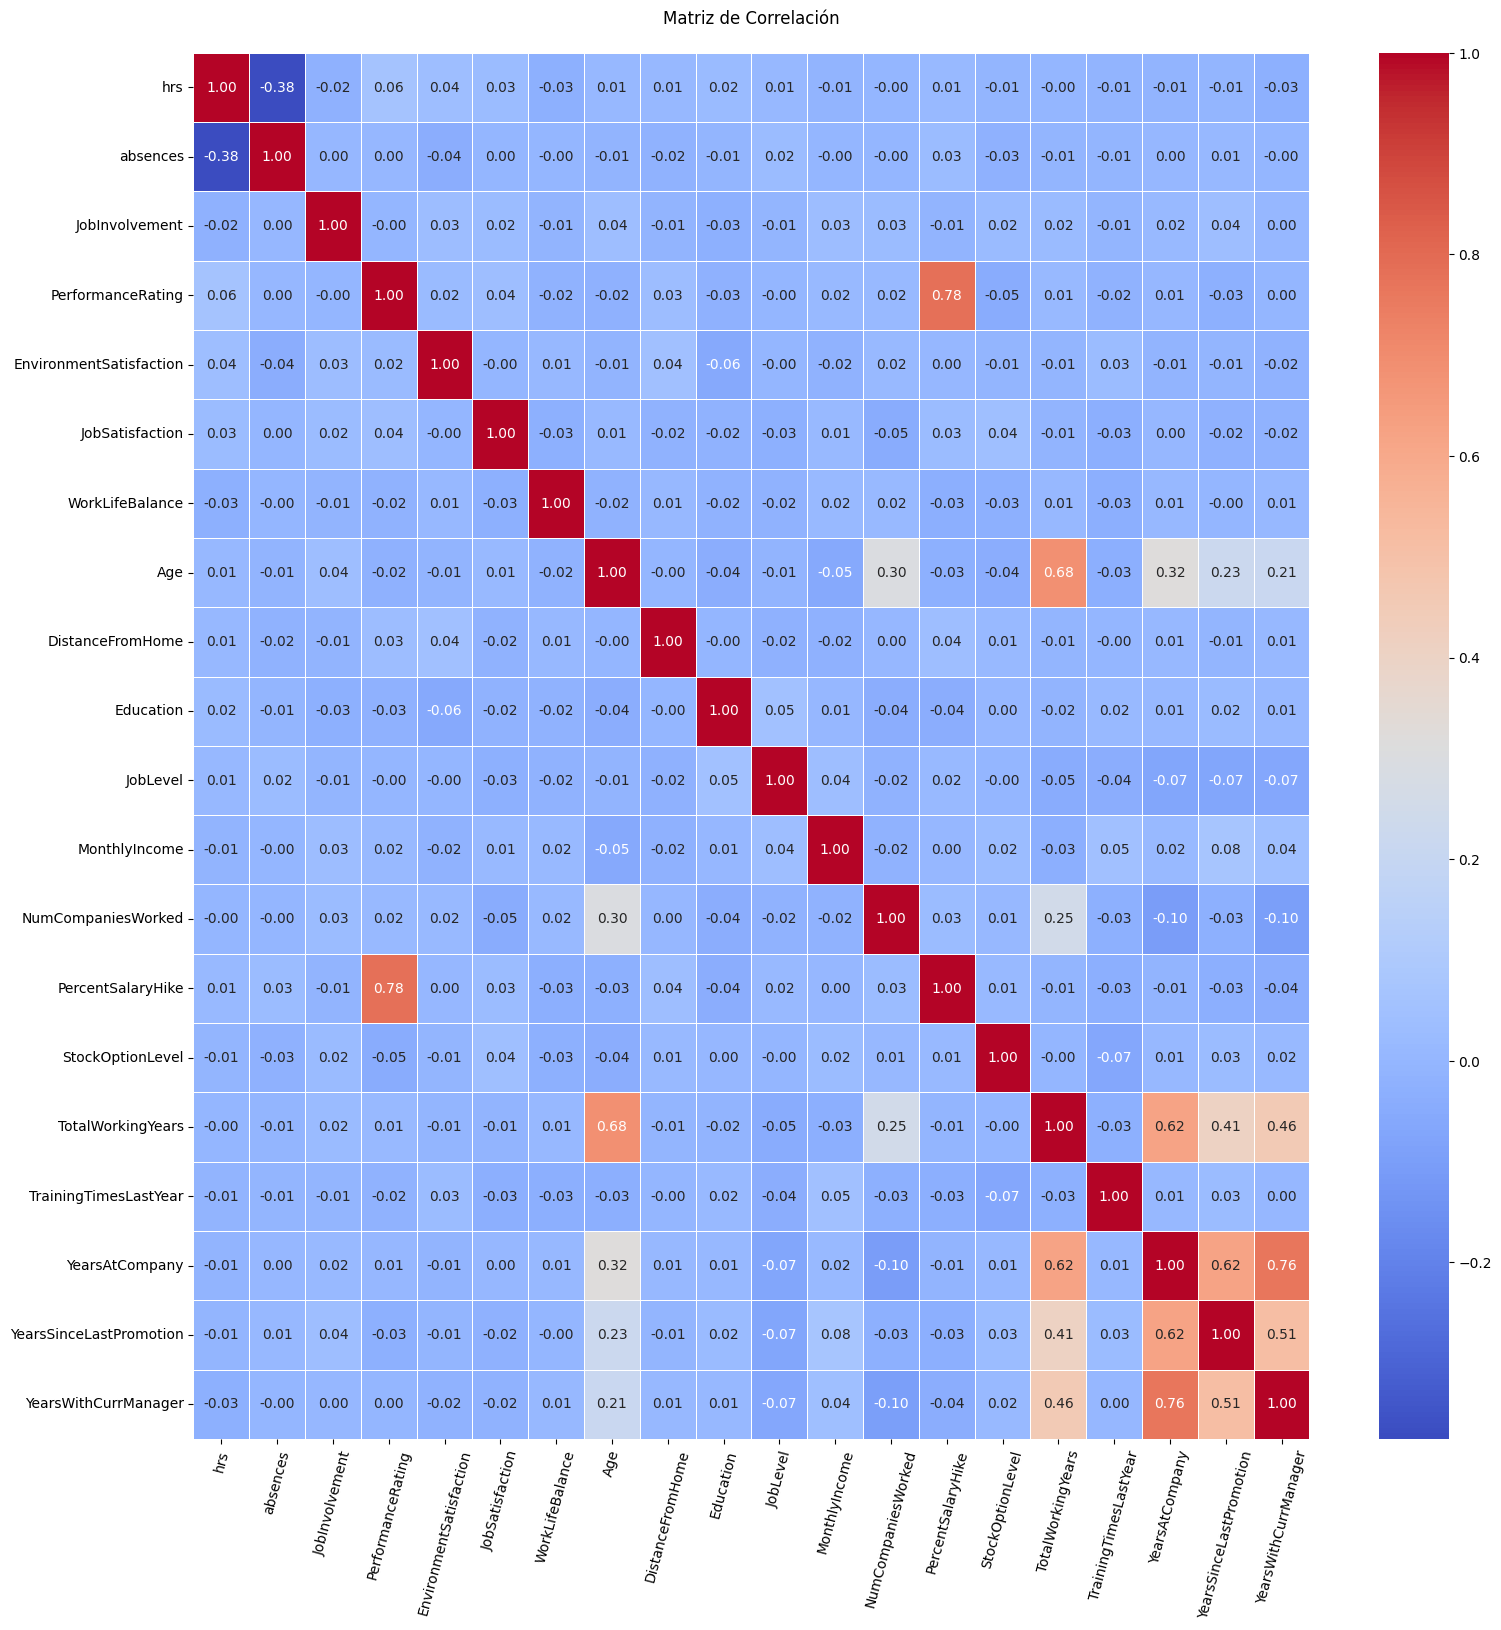

In [252]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()


plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm")
plt.xticks(rotation=75)
plt.title("Matriz de Correlación\n")
plt.show()

No hay correlaciones extremadamente altas, cercanas a 1 o -1, las variables no son redundantes ni son fuertemente dependientes entre sí. Pero sí algunas correlaciones moderadas que podemos considerar.

__Relación entre antigüedad y experiencia laboral:__

- YearsAtCompany y YearsWithCurrManager (0.76): Los empleados que llevan más tiempo en la empresa, más probabilidad de que hayan estado más tiempo con el mismo gerente.
- YearsAtCompany y TotalWorkingYears (0.62): Cuanto más tiempo ha trabajado una persona en general, más tiempo puede haber pasado en la empresa actual.

__Relación entre PercentSalaryHike y PerformanceRating (0.78):__ Hay una alta correlación entre el incremento salarial y la calificación de desempeño. Los empleados con mejor rendimiento reciben mayores aumentos salariales.

- Podríamos evaluar si PercentSalaryHike es redundante, ya que está fuertemente ligada a PerformanceRating.



En cuanto al resto, tienen correlaciones muy bajas con todas las demás, lo que indica que pueden ser independientes o estar influenciadas por otros factores no considerados. Así, podríamos revisar si estas variables tienen algún impacto significativo en la variable objetivo, o si pueden eliminarse.

## 8. __Identificamos la correlación con la variable objetivo__

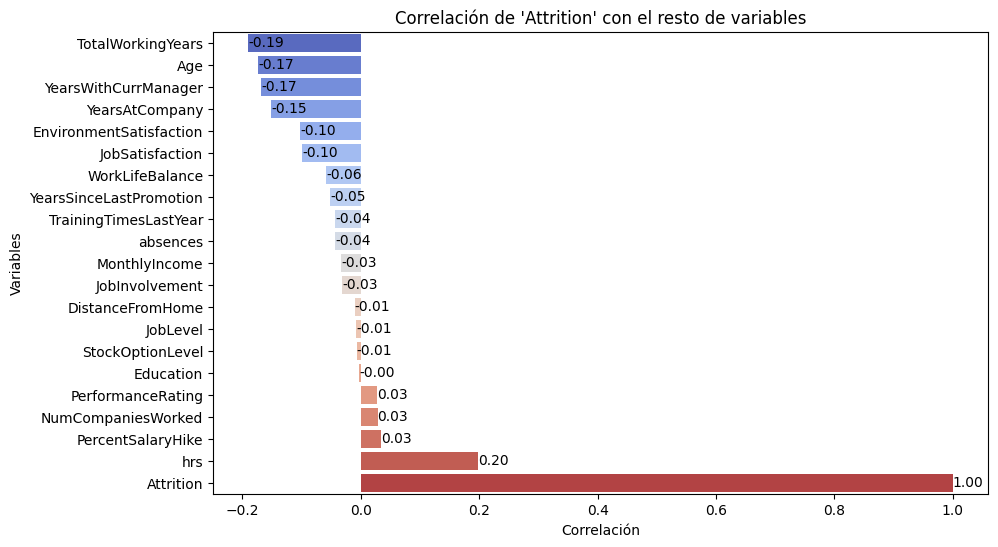

In [253]:
# Convertir la variable objetivo a numérica
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Asegurar que solo trabajamos con columnas numéricas
df_corr = df.select_dtypes(include=['number'])
attrition_correlation = df_corr.corr()["Attrition"].sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=attrition_correlation.index, x=attrition_correlation.values, palette="coolwarm")

# Añadir valores en las barras
for index, value in enumerate(attrition_correlation.values):
    ax.text(value, index, f"{value:.2f}", ha="left", va="center", fontsize=10, color="black")

plt.title("Correlación de 'Attrition' con el resto de variables")
plt.xlabel("Correlación")
plt.ylabel("Variables")
plt.show()


Podemos comprobar que no hay una variable con una correlación extremadamente fuerte con Attrition, pero sí que muchas de ellas tienen una relación muy baja, por ello vamos a considerar su elimiación con el fin de simplificar el modelo.

Junto con las horas trabajadas, las variables de antigüedad (YearsAtCompany, TotalWorkingYears) son las que más influyen en la retención, podemos evaluar las relaciones con YearsWithCurrManager para comprobar si esta última sería redundante.

- Podríamos eliminar las variables que tienen muy baja correlación con la objetivo.

In [254]:
# Filtrar variables con correlación menor a 0.05 en valor absoluto
low_corr_columns = attrition_correlation[abs(attrition_correlation) < 0.05].index.tolist()

# Eliminar estas columnas del dataset
df_filtered = df.drop(columns=low_corr_columns, errors='ignore')

print(f"Se han eliminado las siguientes columnas por baja correlación: {low_corr_columns}")


Se han eliminado las siguientes columnas por baja correlación: ['TrainingTimesLastYear', 'absences', 'MonthlyIncome', 'JobInvolvement', 'DistanceFromHome', 'JobLevel', 'StockOptionLevel', 'Education', 'PerformanceRating', 'NumCompaniesWorked', 'PercentSalaryHike']


## __9. Visualizamos relaciones entre las variables correlacionadas__
Realizamos una exploración visual de las relaciones entre las variables con alta correlación, para ayudarnos a decidir si hay redundancias o si algunas variables debemos transformarlas antes de usarlas en un modelo predictivo.

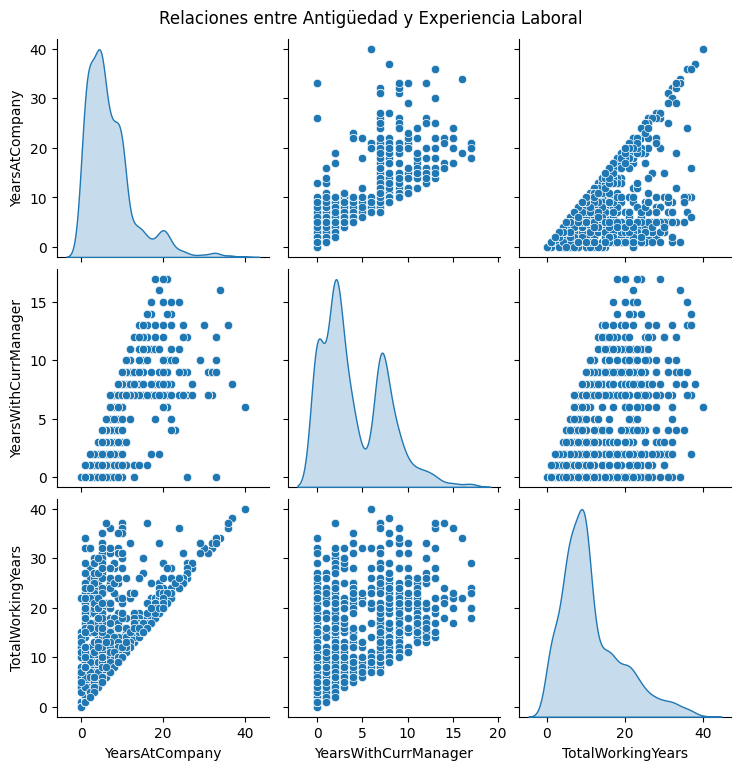

In [255]:

# Visualizar relaciones entre variables de antigüedad con pairplot
sns.pairplot(df, vars=["YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears"], diag_kind="kde")
plt.suptitle("Relaciones entre Antigüedad y Experiencia Laboral", y=1.02)
plt.show()



__Relación entre Antigüedad y Experiencia Laboral__

- YearsAtCompany y YearsWithCurrManager (0.76): Relación fuerte, posible redundancia.
- YearsAtCompany y TotalWorkingYears (0.62): Relación esperada, pero aporta información diferente.
- Conclusión: YearsAtCompany o YearsWithCurrManager podría ser redundante.

Se podría evaluar impacto en el modelo y eliminar una si es necesario.